In [45]:
# Importo librerias para analizar y exportar
import pandas as pd # trabajar con dataframes
import yfinance as yf # Descargar info de yfinance S&P500
import seaborn as sns # GRAFICAR
import matplotlib.pyplot as plt # GRAFICAR
%matplotlib inline

In [46]:
# yfinance descarga de S&P500 al completo desde fecha del 2000 hasta la actualidad.
yf.download('^GSPC', start='2000-01-01')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...
2023-02-22,4001.830078,4017.370117,3976.899902,3991.050049,3991.050049,4079320000
2023-02-23,4018.600098,4028.300049,3969.189941,4012.320068,4012.320068,3952940000
2023-02-24,3973.239990,3978.250000,3943.080078,3970.040039,3970.040039,3877700000


In [48]:
# Guardo la data
data = yf.download('^GSPC', start='2000-01-01')

[*********************100%***********************]  1 of 1 completed


In [49]:
#Aqui para descargar la info sin alterar.
#data.to_csv('data.csv')

In [50]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...
2023-02-22,4001.830078,4017.370117,3976.899902,3991.050049,3991.050049,4079320000
2023-02-23,4018.600098,4028.300049,3969.189941,4012.320068,4012.320068,3952940000
2023-02-24,3973.239990,3978.250000,3943.080078,3970.040039,3970.040039,3877700000


In [51]:
# Devuelvo fecha como columna y recreo el indice
data = data.reset_index()

In [52]:
# Reviso los tipos de dato
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5826 entries, 0 to 5825
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5826 non-null   datetime64[ns]
 1   Open       5826 non-null   float64       
 2   High       5826 non-null   float64       
 3   Low        5826 non-null   float64       
 4   Close      5826 non-null   float64       
 5   Adj Close  5826 non-null   float64       
 6   Volume     5826 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 318.7 KB


In [53]:
# Veo las columnas para analizar
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [54]:
# No hay valores vacíos
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Outliers (Univariado/Multivariado)

In [55]:
#Reviso un rato 
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5826.000000,5826.000000,5826.000000,5826.000000,5826.000000,5.826000e+03
mean,1887.933618,1899.228380,1875.691830,1888.145690,1888.145690,3.303245e+09
std,977.981929,983.109510,972.395779,978.102537,978.102537,1.522596e+09
min,679.280029,695.270020,666.789978,676.530029,676.530029,3.560700e+08
25%,1184.657501,1191.820038,1177.299988,1184.547516,1184.547516,1.986958e+09
50%,1434.625000,1443.955017,1425.984985,1434.790039,1434.790039,3.409790e+09
75%,2393.219971,2399.627502,2381.592468,2393.307495,2393.307495,4.159688e+09
max,4804.509766,4818.620117,4780.040039,4796.560059,4796.560059,1.145623e+10


<function matplotlib.pyplot.show(close=None, block=None)>

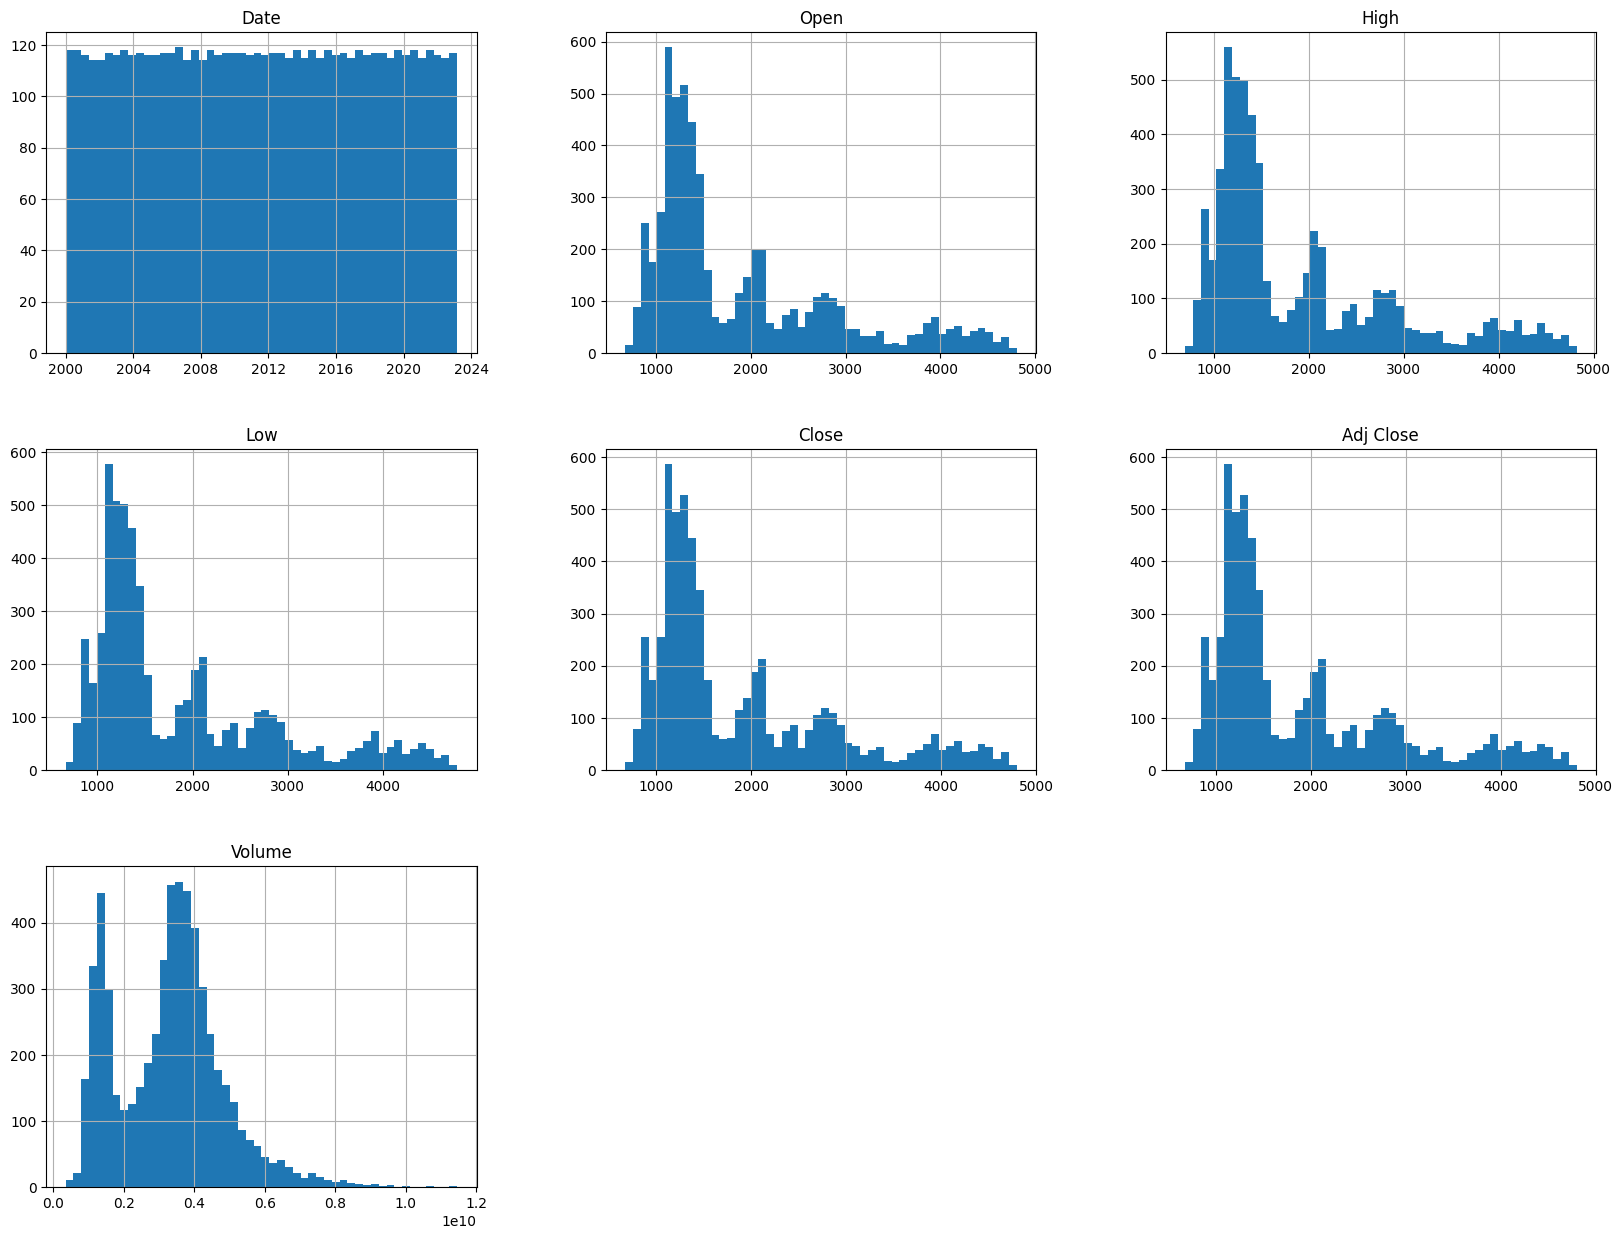

In [56]:
# Ve que resultados se pueden tomar en cada columa.
data.hist(bins = 50, figsize = (20,15))
plt.show

<Axes: xlabel='Close', ylabel='Count'>

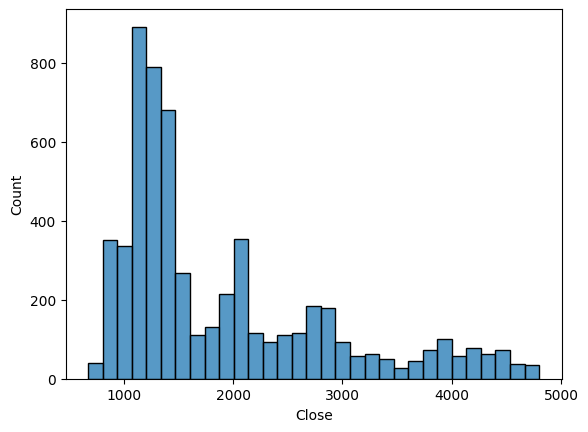

In [57]:
# Revisando en especial Close = Precio de Cierre
sns.histplot(data['Close'])

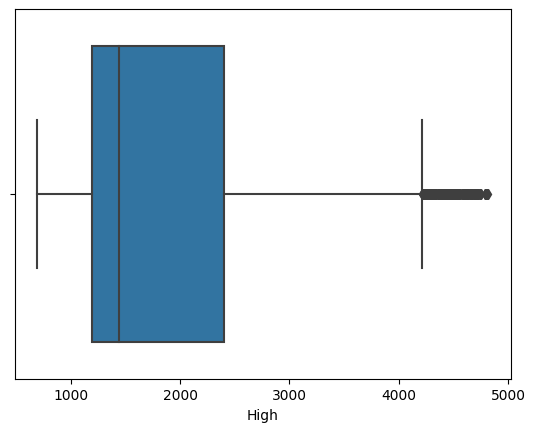

In [58]:
# Reviso la cifra mayor entre los intervalos de Open = Inversion y Close = Retorno. Para retirar primero aqui los outliers y considerar para el resto.
sns.boxplot(x = 'High', data = data)
plt.show()

In [59]:
# Reviso los valores que puede tomar
print(data.High.max())
print(data.High.min())

4818.6201171875
695.27001953125


In [60]:
# Quartiles acceptable dentro del vigote.
Q1 = data['High'].quantile(0.25)
Q3 = data['High'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(BI)
print(BS)

1191.8200378417969
2399.6275024414062
1207.8074645996094
-619.8911590576172
4211.33869934082


In [61]:
# Se revisa un momento el tamaño del data frame principal y los outliers que se retirarian.
print('Cantidad de registros totales:', data.shape[0]) # 
print('Cantidad de outliers:', data[(data['High']<BI) | (data['High']>BS)].shape[0] )

Cantidad de registros totales: 5826
Cantidad de outliers: 245


In [62]:
# Se eliminan aquellos datos fuera de el bigote, por encima y por debajo y lo almaceno en el dataframe de transición.
out_duration_int=(data['High']<BI) | (data['High']>BS)
data = data[~out_duration_int]
print(data.shape[0])


5581


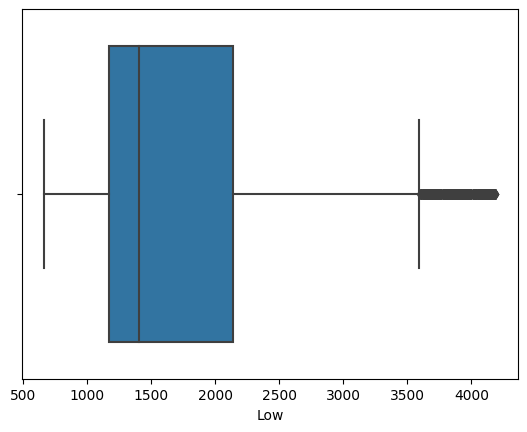

In [63]:
# Reviso low para descartar de una vez segun valores minimos que puedna considerarse.
sns.boxplot(x = 'Low', data = data)
plt.show()

In [64]:
#Reviso los quartiles.
Q1 = data['Low'].quantile(0.25)
Q3 = data['Low'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(BI)
print(BS)

1167.8900146484375
2139.570068359375
971.6800537109375
-289.63006591796875
3597.0901489257812


In [65]:
# Decido considerar el maximo posible para no descartar.
print(data.High.max())

4211.02978515625


In [66]:
# Se revisa un momento el tamaño del data frame principal.
BS = data.High.max()
print('Cantidad de registros totales:', data.shape[0]) # 
print('Cantidad de outliers:', data[(data['Low']<BI) | (data['Low']>BS)].shape[0] )

Cantidad de registros totales: 5581
Cantidad de outliers: 0


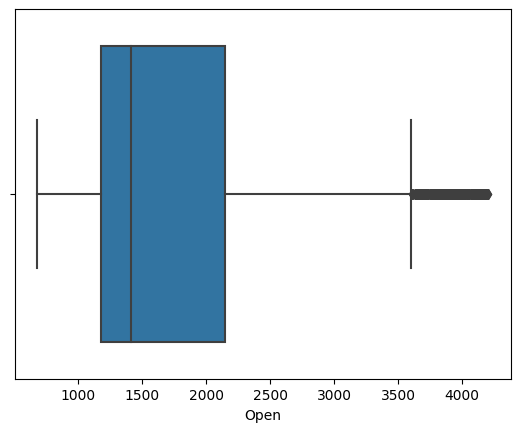

In [67]:
#Mismo proceso por si las dudas.
sns.boxplot(x = 'Open', data = data)
plt.show()

In [68]:
Q1 = data['Open'].quantile(0.25)
Q3 = data['Open'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(BI)
print(BS)

1176.68994140625
2149.719970703125
973.030029296875
-282.8551025390625
3609.2650146484375


In [69]:
print(data.High.max())
print(data.Low.min())

4211.02978515625
666.7899780273438


In [70]:
# Se revisa un momento el tamaño del data frame principal.
BS = data.High.max()
print('Cantidad de registros totales:', data.shape[0]) # 
print('Cantidad de outliers:', data[(data['Open']<BI) | (data['Open']>BS)].shape[0] )

Cantidad de registros totales: 5581
Cantidad de outliers: 0


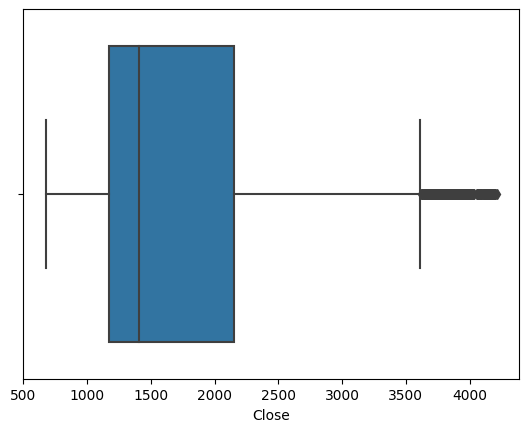

In [71]:
sns.boxplot(x = 'Close', data = data)
plt.show()

In [72]:
Q1 = data['Close'].quantile(0.25)
Q3 = data['Close'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(BI)
print(BS)

1176.1199951171875
2151.1298828125
975.0098876953125
-286.39483642578125
3613.6447143554688


In [73]:
print(data.High.max())
print(data.Low.min())

4211.02978515625
666.7899780273438


In [74]:
data['Volume'].describe()

count    5.581000e+03
mean     3.256604e+09
std      1.528301e+09
min      3.560700e+08
25%      1.880700e+09
50%      3.364540e+09
75%      4.109510e+09
max      1.145623e+10
Name: Volume, dtype: float64

<Axes: xlabel='Volume', ylabel='Count'>

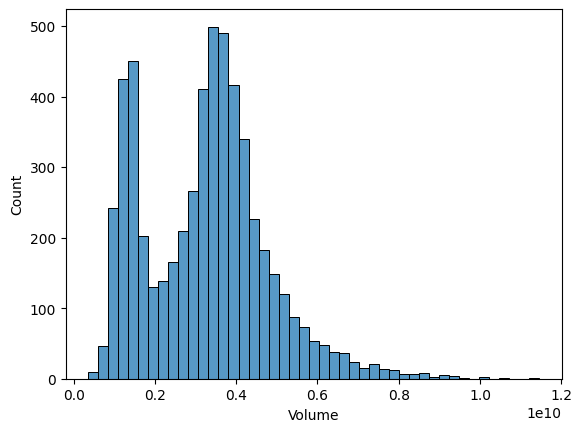

In [75]:
# Reviso el volumen, que es la interaccion en la bolsa.
sns.histplot(data['Volume'])

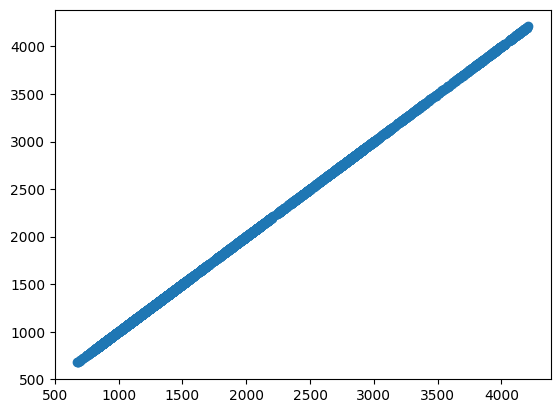

In [76]:
# Casi indenticos entre ambas columnas.
plt.scatter(data['Adj Close'], data['Close'])
plt.show()

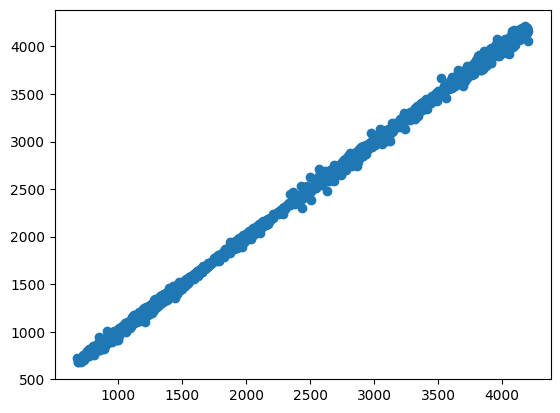

In [77]:
#Relativamente similares de igual manera.
plt.scatter(data['Open'], data['Close'])
plt.show()

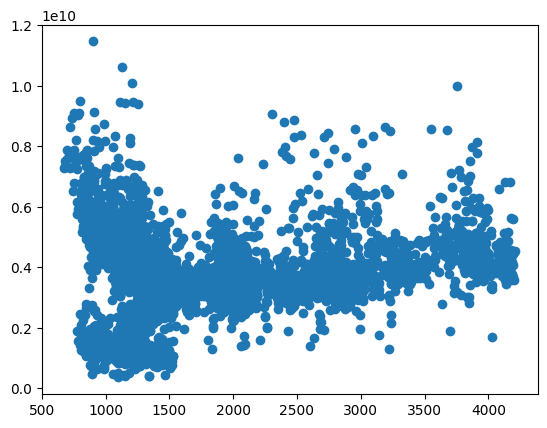

In [78]:
# Relacion que existe entre ambas.
plt.scatter(data['Close'], data['Volume'])
plt.show()

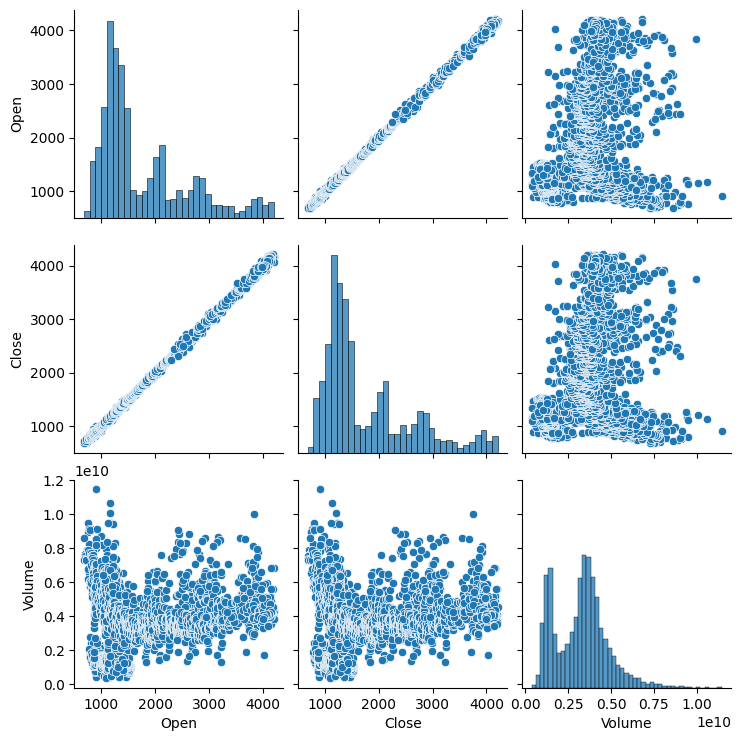

In [79]:
sns.pairplot(data = data, vars=['Open','Close','Volume'])
plt.show()

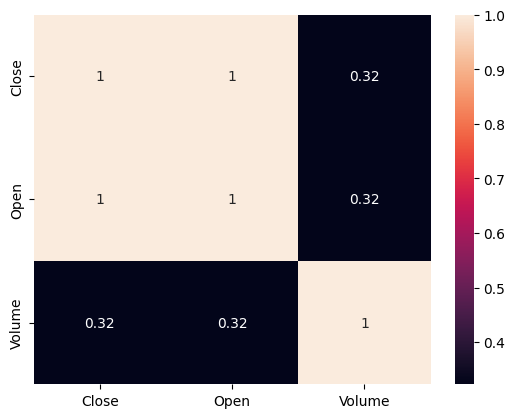

In [80]:
#Cuadro de relacion entre estos tres en especifico.
sns.heatmap(data[['Close','Open','Volume']].corr(), annot=True)
plt.show()

In [81]:
#Almaceno el dataset en un csv para exportarlo a power bi.
data.to_csv('data.csv')

In [82]:
'''
plt.figure()
plt.bar(data['year'],data['Close'])
plt.ylabel('Cierre de inversiones')
plt.xlabel('Años')
plt.title('Cierre x Año')
plt.show()
'''

"\nplt.figure()\nplt.bar(data['year'],data['Close'])\nplt.ylabel('Cierre de inversiones')\nplt.xlabel('Años')\nplt.title('Cierre x Año')\nplt.show()\n"